In [25]:
import pandas as pd
import pylab as pl
import numpy as np
import datetime
import matplotlib as plt

In [12]:
#ensure correct size

projects = pd.read_csv('/Users/emmapeterson/Downloads/lab3/projects.csv')
print (projects.shape[0])

resources = pd.read_csv('/Users/emmapeterson/Downloads/lab3/resources.csv')
print (resources.shape[0])

essays = pd.read_csv('/Users/emmapeterson/Downloads/lab3/essays.csv')
print (essays.shape[0])

outcomes = pd.read_csv('/Users/emmapeterson/Downloads/lab3/outcomes.csv')
print (outcomes.shape[0])

donations = pd.read_csv('/Users/emmapeterson/Downloads/lab3/donations.csv')
print (donations.shape[0])

664098
3667217
619326
3097989


In [115]:
#merge projects with outcomes
project_outcomes = pd.merge(projects, outcomes, on='projectid')

In [58]:
#obtain count of exciting projects per year

data = {}

for index, row in project_outcomes.iterrows():
    
    date_posted = project_outcomes.ix[index, 'date_posted']
    exciting = project_outcomes.ix[index, 'is_exciting']
    
    if exciting == 't':
        year = str(date_posted[:4])   
        data[year] = data.get(year, 0) + 1

In [61]:
df = pd.DataFrame(list(data.items()), columns=['year', 'count'])
df

,year,count
0,2012,7755
1,2010,5099
2,2013,14278
3,2011,9578


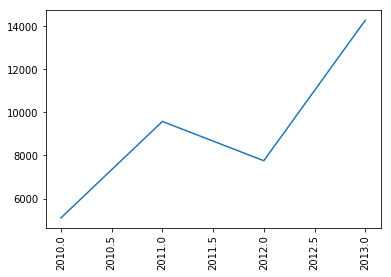

In [63]:
#plot exciting projects over time
sort_year = df.sort_values('year', ascending=True)
pl.plot(sort_year['year'], sort_year['count'])
pl.xticks(rotation='vertical')
pl.show()

In [ ]:
#selected features:
#teacher_teach_for_america
#students_reached
#poverty level

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [117]:
#clean dataframe

for index, row in project_outcomes.iterrows():
    
    if project_outcomes.ix[index, 'teacher_teach_for_america'] == 'f':
        project_outcomes.set_value(index, 'teacher_teach_for_america', 0)
    else:
        project_outcomes.set_value(index, 'teacher_teach_for_america', 1)
    
    poverty_level= project_outcomes.ix[index, 'poverty_level']
    
    if poverty_level == 'highest poverty':
        project_outcomes.set_value(index, 'poverty_level', 3)
    elif poverty_level == 'high poverty':
        project_outcomes.set_value(index, 'poverty_level', 2)
    elif poverty_level == 'moderate poverty':
        project_outcomes.set_value(index, 'poverty_level', 1)
    else:
        project_outcomes.set_value(index, 'poverty_level', 0)

project_outcomes_no_na = project_outcomes.dropna()

In [118]:
from sklearn.cross_validation import train_test_split

project_train, project_test = train_test_split(project_outcomes_no_na)

In [119]:
X  =  project_train[['teacher_teach_for_america', 'students_reached', 'poverty_level']]    # X includes columns 0,1,2,3
y  =  project_train['is_exciting']   # Get target column
 
neighbors = KNeighborsClassifier(n_neighbors=5)
neighbors.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [120]:
#find 5 neighbors for a project with a teach for america teacher, 
#reaching 100 students, with the highest poverty level'
print(neighbors.kneighbors([[1, 100, 3]])) 

(array([[ 0.,  0.,  0.,  0.,  0.]]), array([[190702, 120393,   1167,  13695, 127192]]))


In [126]:
#decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [129]:
tree.export_graphviz(clf, out_file='tree.dot')